In [1]:
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import os
from scipy.io import savemat

class CustomAxes(plt.Axes):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._stored_data = []

    def _save_data(self):
        # Define the folder and filename for saving
        data_folder = 'plot_data'
        os.makedirs(data_folder, exist_ok=True)
        filename = f"plot_data_{len(os.listdir(data_folder))}.mat"
        filepath = os.path.join(data_folder, filename)

        # Prepare the data for savemat
        mat_data = {f'data_{i}': {'type': plot_type, 'args': args, 'kwargs': kwargs} 
                    for i, (plot_type, args, kwargs) in enumerate(self._stored_data)}

        # Save the data as a .mat file
        savemat(filepath, mat_data)

    def plot(self, *args, **kwargs):
        self._stored_data.append(('plot', args, kwargs))
        self._save_data()  # Auto-save data when plotting
        return super().plot(*args, **kwargs)

    def scatter(self, *args, **kwargs):
        self._stored_data.append(('scatter', args, kwargs))
        self._save_data()  # Auto-save data when plotting
        return super().scatter(*args, **kwargs)

    def bar(self, *args, **kwargs):
        self._stored_data.append(('bar', args, kwargs))
        self._save_data()  # Auto-save data when plotting
        return super().bar(*args, **kwargs)

    # Other plotting methods can be overridden similarly

class ExtendedFigure(Figure):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def add_subplot(self, *args, **kwargs):
        ax = super().add_subplot(*args, **kwargs, axes_class=CustomAxes)
        return ax

# Example usage
fig = ExtendedFigure()
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2, 3, 4], [10, 20, 30, 40], 'ro-')  # This will automatically save the data
ax.scatter([1, 2, 3, 4], [40, 30, 20, 10])      # This will automatically save the data
ax.bar([1, 2, 3, 4], [10, 20, 30, 40])          # This will automatically save the data

plt.show()


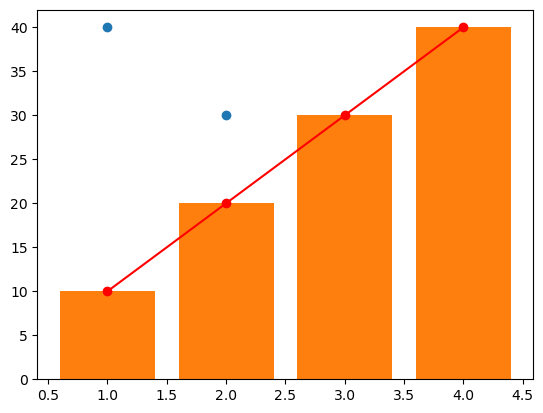

In [3]:
fig